<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">

# Hotel Reservation Dataset

## Présentation du dataset

### Objectif du dataset

Le dataset contient les données de réservations en ligne des clients d'un hotel. **Le but de ce jeu de données est d'arriver à prédir si le client va respecter sa réservation ou l'annuler**.

### Description des données

* **Booking_ID** : unique identifier of each booking
* **no_of_adults** : Number of adults
* **no_of_children** : Number of Children
* **no_of_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan** : Type of meal plan booked by the customer:
* **required_car_parking_space** : Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved** : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year** : Year of arrival date
* **arrival_month** : Month of arrival date
* **arrival_date** : Date of the month
* **market_segment_type** : Market segment designation.
* **repeated_guest** : Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations** : Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled** : Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room** : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests** : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status** : Flag indicating if the booking was canceled or not.


In [1]:
import pandas as pd 
import numpy as np


dataset = pd.read_csv('archive/Hotel Reservations.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Analyse des données
ID à supprimer : pas pertinenent
<br>
Des variables à discrétiser : avg_price_per_room, lead_time, no_of_previous_bookings_not_canceled
<br>
Attention à certaines variables qui sont majoritairement nulles

In [2]:
def dataAnalysis(dataset):
    for series_name, series in dataset.items():
        #print(series_name)
        print("**************\n")
        print(series.value_counts())
        print("**************\n")
    

In [3]:
dataAnalysis(dataset)

**************

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
**************

**************

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
**************

**************

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
**************

**************

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
**************

**************

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
**************

**************

type_of_meal_pla

In [4]:
# to execute only once
dataset = dataset.drop('Booking_ID',axis=1)
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
# Decomposition en quartile

def quartile(feature):
    prem_quartile = feature.quantile(0.25)
    de_quartile = feature.quantile(0.5)
    trois_quartile = feature.quantile(0.75)
    return (prem_quartile,de_quartile,trois_quartile)

In [6]:
# Discrétistation des données


def discretisation(features,dataset):
    for feature in features:
        pQ,dQ,tQ = quartile(feature)
        dataset.loc[(feature <= pQ), feature.name] = 1
        dataset.loc[(feature > pQ) & (feature <= dQ), feature.name] = 2
        dataset.loc[(feature > dQ) & (feature <= tQ), feature.name] = 3
        dataset.loc[(feature > tQ), feature.name] = 4

In [7]:
continuFeatures = [dataset.avg_price_per_room,dataset.lead_time, dataset.no_of_previous_bookings_not_canceled]
discretisation(continuFeatures,dataset)

In [8]:
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,4,2017,10,2,Offline,0,0,4,1.0,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,1,2018,11,6,Online,0,0,4,3.0,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,4,1.0,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,5,20,Online,0,0,4,3.0,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,4,11,Online,0,0,4,2.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,3,2018,8,3,Online,0,0,4,4.0,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,4,2018,10,17,Online,0,0,4,2.0,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,4,2018,7,1,Online,0,0,4,2.0,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,3,2018,4,21,Online,0,0,4,2.0,0,Canceled


In [9]:
# Pre-process des données 


dataframe = dataset.sample(frac=1).reset_index(drop=True)



def train_test_dev_split(dataset):
    x_train = dataset.sample(frac=0.7)

    y_train = x_train['booking_status']
    
    x_test = dataset.drop(x_train.index,axis=0)
    
    y_test = x_test['booking_status']

    return (x_train,y_train,x_test,y_test)


x_train, y_train,x_test,y_test = train_test_dev_split(dataset)

<h1>KPPV<h1>

In [10]:
import numpy as np

#paramêtres
k = 3

# Entraînement
def fit_kppv(X_train, y_train):
    X_train = X_train
    y_train = y_train

# Prédiction
def predict(X_test):
    predictions = []
    for x in X_test:
        # Calcul des distances pour x
        distances = np.linalg.norm(k.X_train - x, axis=1)

        # Trier les distances de manière croissante
        indices_tries = np.argsort(distances)

        # Sélectionner les k plus proches voisins
        k_voisins = k.y_train[indices_tries[:k]]

        prediction = np.bicount(k_voisins).argmax()
        predictions.append(prediction)

    return np.array(predictions)

In [11]:
import numpy as np



def fit(X_train, y_train):
    # La fonction d'entraînement simplement retourne les données d'entraînement
    return X_train, y_train

def predict(X_train, y_train, x_test, k):
    distances = []

    # Calculer les distances entre x_test et tous les points d'entraînement
    for i in range(len(X_train)):
        dist = np.linalg.norm(x_test - X_train[i])
        distances.append((dist, y_train[i]))

    # Trier les distances par ordre croissant
    distances.sort(key=lambda x: x[0])

    # Sélectionner les k plus proches voisins
    neighbors = distances[:k]

    # Compter les occurrences de chaque classe parmi les k voisins
    counts = {}
    for neighbor in neighbors:
        label = neighbor[1]
        counts[label] = counts.get(label, 0) + 1

    # Retourner la classe majoritaire parmi les k voisins
    predicted_label = max(counts, key=counts.get)
    return predicted_label


# Entraîner le modèle
X_train, y_train = fit(X_train, y_train)

# Prédire la classe du point x_test
predicted_class = predict(X_train, y_train, x_test, k)

print("Classe prédite :", predicted_class)

NameError: name 'X_train' is not defined

In [ ]:
def fit_(X_train, y_train):
    X_train = X_train
    y_train = y_train
    

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fonction pour calculer la distance euclidienne entre deux points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculer les distances euclidiennes entre x et tous les points d'entraînement
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

            # Trier les indices des distances croissantes
            indices_sorted = np.argsort(distances)

            # Sélectionner les k plus proches voisins
            k_nearest_labels = [self.y_train[i] for i in indices_sorted[:self.k]]

            # Vote majoritaire pour la prédiction
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)

        return np.array(predictions)



# Appliquer l'algorithme k-NN
knn = KNN(k=3)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

# Calculer l'exactitude des prédictions
accuracy = accuracy_score(y_test, predictions)
print("Exactitude du modèle : {:.2%}".format(accuracy))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [27]:
from collections import Counter
import numpy as np 

def KNN(X_train , y_train , X_test):
    distance = [0] * X_train.shape[0]
    for columns in X_train.columns:
        for index in range(len(X_train[columns])):
            distance[index] += X_train[columns][index] - X_test[columns][index]
    distance = np.sqrt(np.array(distance))
    return Counter(y_test[np.argsort(distance)[:3]]).most_common()[0][0]


KNN(x_train, y_train, x_test)

KeyError: 0

<h1>Sklearn<h1>

In [12]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Création du classifieur
classifier = KNeighborsClassifier(n_neighbors=3)
x_train = x_train._get_numeric_data()
print(x_train.shape)

# Entraînement du modèle
classifier.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = classifier.predict(x_train)
y_pred


# Évaluation de la précision
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy) 

(25392, 14)
Accuracy: 0.8997321991178324


In [15]:
y_train.shape

(25392,)

In [16]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix(y_pred, y_test):
    return cm(y_test, y_pred, labels=['Canceled', 'Not_Canceled'])

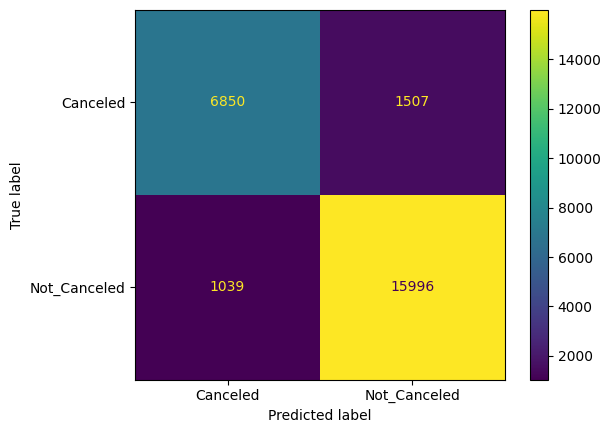

In [18]:
#print(y_pred)
co = confusion_matrix(y_pred,y_train)
cd = ConfusionMatrixDisplay(confusion_matrix=co,display_labels=['Canceled', 'Not_Canceled'])
cd.plot()

In [33]:
def distance_euclidienne(x1, x2):
    # Calcule la distance euclidienne entre deux vecteurs
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [48]:
def predict(X_train, y_train, x_test, k):
    distances = []

    # Calculer les distances entre x_test et tous les points d'entraînement
    for i in range(X_train.shape[0]):
        
        dist = distance_euclidienne(x_test, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))

    # Trier les distances par ordre croissant
    nearest_neighbors = sorted(distances)[:k]

    # Sélectionner les k plus proches voisins

    # Compter les occurrences de chaque classe parmi les k voisins
    counts = {}
    for neighbor in nearest_neighbors:
        print(neighbor)
        #label = neighbor[1]
       # counts[label] = counts.get(label, 0) + 1

    # Retourner la classe majoritaire parmi les k voisins
    


In [51]:
predict(x_train,y_train,x_test.iloc[0],50)

(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(0.0, 'Canceled')
(1.4142135623730951, 'Canceled')
(1.4142135623730951, 'Not_Canceled')
(1.4142135623730951, 'Not_Canceled')
(1.4142135623730951, 'Not_Canceled')
